# DSC630 Week 1: Introduction to Predictive Analytics

#### Bryan Rogers
#### Bellevue University
#### DSC630: Predictive Analytics
#### 11/28/23

## 1.2 Assignment: Python/R Refresher

###  1. Write a summary of your data and identify at least two questions to explore visually with your data.

For my dataset, I am choosing to look at a historical dataset of NFL game data for the years 2002 to 2023. I found this dataset on Kaggle and thought that it has enough data with over 5,000 rows of data to look through and discover some interesting findings. This dataset shows a handful of various statistical categories for both home and away teams for  One question that I am interested in answering is "Do home or away teams gain more total yards on offense?". Another question that I would take a look at would be "Does the home team or away team generate more turnovers per drive?"

The Kaggle link for the dataset: https://www.kaggle.com/datasets/cviaxmiwnptr/nfl-team-stats-20022019-espn

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# load the dataset .csv into a DataFrame
nfl_stats_df = pd.read_csv(r"nfl_team_stats_2002-2022.csv")

In [22]:
# show the first 10 rows of the DataFrame
nfl_stats_df.head(10)

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,...,0-8,0-6,13,15,0,0,27:32,32:28,16,13
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,...,0-9,0-8,17,18,2,0,21:06,39:08,37,31
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,...,0-7,0-6,17,17,0,0,31:31,28:29,23,27
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,...,0-7,0-5,11,15,0,0,37:48,22:12,34,6
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,...,0-10,0-10,20,17,0,0,30:16,29:44,40,39
5,2002-09-08,Falcons,Packers,22,29,4-8,8-15,0-0,1-1,194,...,0-8,0-9,15,17,0,0,30:55,38:50,34,37
6,2002-09-08,Eagles,Titans,17,22,7-15,6-10,1-1,0-0,181,...,0-3,0-7,17,16,0,0,29:12,30:48,24,27
7,2002-09-08,Lions,Dolphins,15,27,7-14,6-12,0-1,1-1,206,...,0-6,0-8,18,16,0,2,25:36,34:24,21,49
8,2002-09-08,Cardinals,Commanders,14,21,4-13,9-16,0-0,1-2,187,...,0-5,0-8,18,18,0,0,25:36,34:24,23,31
9,2002-09-08,Ravens,Panthers,15,15,5-14,5-14,0-0,0-0,212,...,0-3,0-2,13,12,0,0,26:09,33:51,7,10


In [23]:
# use describe and shpae to show information about the DataFrame
nfl_stats_df.describe()

,first_downs_away,first_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,rushing_attempts_away,rushing_attempts_home,...,int_away,int_home,turnovers_away,turnovers_home,drives_away,drives_home,def_st_td_away,def_st_td_home,score_away,score_home
count,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,...,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000,5641.000000
mean,19.033505,19.968445,221.456834,227.349052,110.913313,117.976245,332.370147,345.325297,26.608225,27.670626,...,0.947882,0.891509,1.580394,1.521716,12.209537,12.145364,0.318029,0.334692,21.139337,23.398511
std,5.072675,4.973625,79.092931,77.613961,50.863886,52.349052,86.276865,83.446688,7.858818,7.840204,...,1.015367,0.997302,1.324335,1.316938,2.580283,2.489866,0.771783,0.793826,10.072014,10.270509
min,3.000000,3.000000,-7.000000,6.000000,-18.000000,-3.000000,26.000000,77.000000,6.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,17.000000,165.000000,173.000000,74.000000,81.000000,273.000000,288.000000,21.000000,22.000000,...,0.000000,0.000000,1.000000,1.000000,11.000000,11.000000,0.000000,0.000000,14.000000,16.000000
50%,19.000000,20.000000,218.000000,222.000000,104.000000,111.000000,332.000000,344.000000,26.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,12.000000,12.000000,0.000000,0.000000,21.000000,23.000000
75%,22.000000,23.000000,275.000000,277.000000,140.000000,149.000000,391.000000,401.000000,32.000000,33.000000,...,2.000000,1.000000,2.000000,2.000000,13.000000,13.000000,0.000000,0.000000,28.000000,30.000000
max,37.000000,40.000000,516.000000,522.000000,404.000000,378.000000,643.000000,653.000000,57.000000,60.000000,...,6.000000,6.000000,8.000000,7.000000,26.000000,25.000000,6.000000,6.000000,59.000000,62.000000


In [31]:
nfl_stats_df.shape

(5641, 39)

In [32]:
nfl_stats_df.info

<bound method DataFrame.info of             date      away     home  first_downs_away  first_downs_home  \
0     2002-09-05     49ers   Giants                13                21   
1     2002-09-08      Jets    Bills                18                26   
2     2002-09-08   Vikings    Bears                19                20   
3     2002-09-08  Chargers  Bengals                27                13   
4     2002-09-08    Chiefs   Browns                24                24   
...          ...       ...      ...               ...               ...   
5636  2023-01-22   Bengals    Bills                30                19   
5637  2023-01-22   Cowboys    49ers                15                21   
5638  2023-01-29     49ers   Eagles                11                25   
5639  2023-01-29   Bengals   Chiefs                18                23   
5640  2023-02-12    Chiefs   Eagles                21                25   

     third_downs_away third_downs_home fourth_downs_away fourth_dow

### 2. Create a histogram or bar graph from your data.

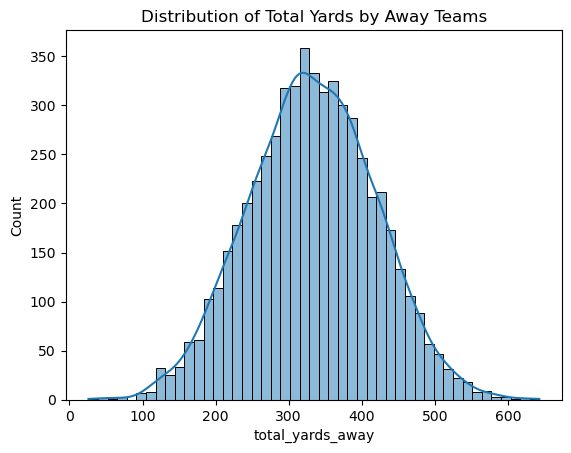

In [24]:
# use seaborn to create a histogram of the columns for question 1
sns.histplot(data=nfl_stats_df, x="total_yards_away", multiple="stack", kde=True)
plt.title("Distribution of Total Yards by Away Teams")
plt.show()


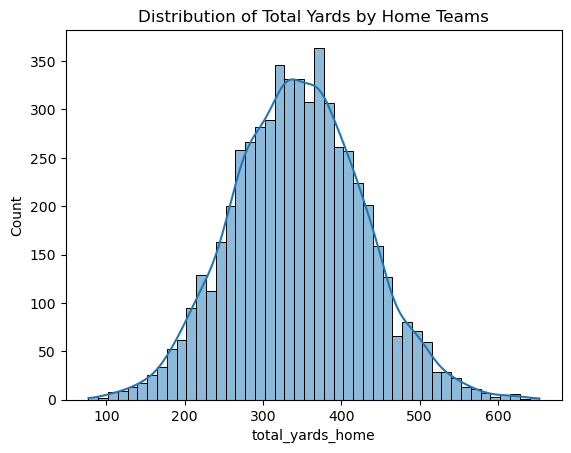

In [25]:
# use seaborn to create a histogram of the columns for question 1
sns.histplot(data=nfl_stats_df, x="total_yards_home", multiple="stack", kde=True)
plt.title("Distribution of Total Yards by Home Teams")
plt.show()

### 3. Create a boxplot from your data.

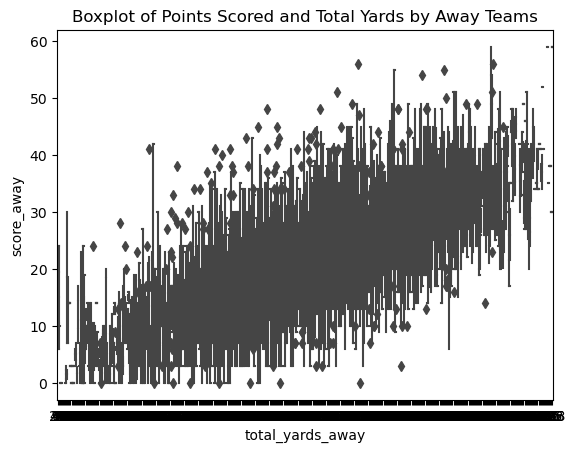

In [26]:
# use seaborn to create a boxplot of the columns for question 1
sns.boxplot(data=nfl_stats_df, x="total_yards_away", y="score_away")
plt.title("Boxplot of Points Scored and Total Yards by Away Teams")
plt.show()


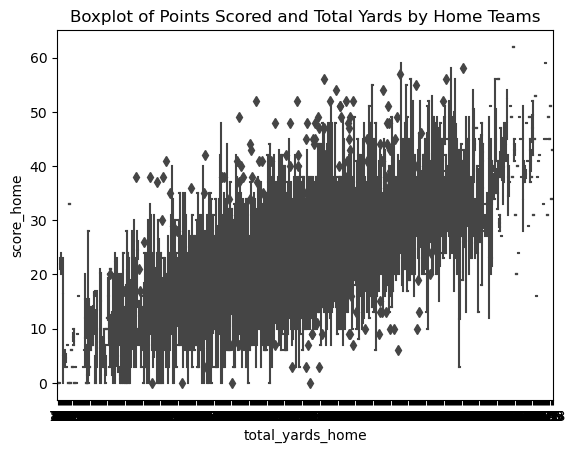

In [27]:
# use seaborn to create a boxplot of the columns for question 1
sns.boxplot(data=nfl_stats_df, x="total_yards_home", y="score_home")
plt.title("Boxplot of Points Scored and Total Yards by Home Teams")
plt.show()

### 4. Create a bivariate plot from your data.

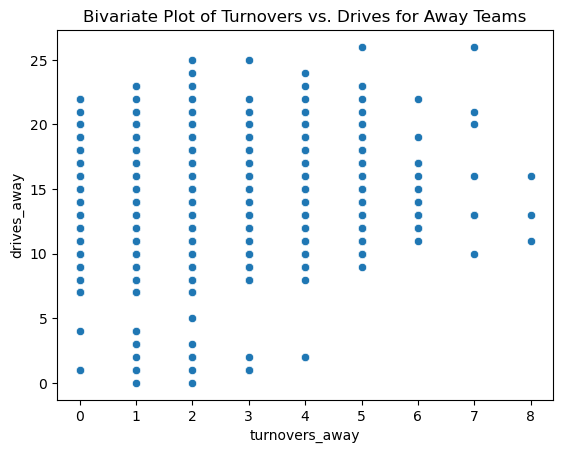

In [28]:
# use seaborn to create a bivariate of the columns for question 2
sns.scatterplot(data=nfl_stats_df, x="turnovers_away", y="drives_away")
plt.title("Bivariate Plot of Turnovers vs. Drives for Away Teams")
plt.show()

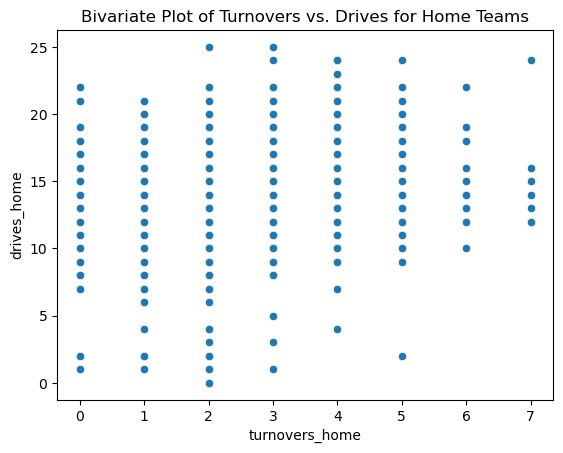

In [29]:
# use seaborn to create a bivariate of the columns for question 2
sns.scatterplot(data=nfl_stats_df, x="turnovers_home", y="drives_home")
plt.title("Bivariate Plot of Turnovers vs. Drives for Home Teams")
plt.show()

### 5. Create any additional visualizations that will help to answer the question(s) you want to answer.

### 6. Summarize your results and make a conclusion. Explain how you arrived at this conclusion and how your visualizations support your conclusion 

1. Do home or away teams gain more total yards on offense? 

After comparing total yards on offense for both home and away teams, I believe that there is insufficent evidence to make a definitive answer. Both the histograms and box plots show that there is an equal correlation between yards gained and points scored for both home and away teams. There are a few outside non-data factors that would need to be considered for an accurate comparison. 

2. Does the home team or away team generate more turnovers per drive?

Taking a look at the bivariate plot to show the ratio of turnovers per drive for home and away teams, the results again provide very similar numbers. There seems to be a little more turnovers per drive for the hometeam however, which I am a little surprised about. Having the home field advantage is supposed to help limit turnover ratio. This would be and interesting topic to look into further to see if there really is a true home field advantage, or do better teams just play better than their opponents. 